In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [2]:
from __future__ import division

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
z_size = 30e3 # crustal thickness
z_num = 301
z_step = z_size / (z_num - 1)
z_vec = np.arange(z_num) * z_step

In [5]:
T_top = 15.

In [6]:
secs_per_my = 3600 * 24 * 365.25 * 1e06

In [7]:
def calc_q_dot_prime(heat_prod, diffusivity=25):
    
    diff_m2 = diffusivity * 1e6
    
    return heat_prod / (diff_m2 )

In [8]:
def analytic_T(q_dot_prime, T_bottom, z_vec=z_vec, Z=z_size/2., T_top=T_top):
    z = z_vec - np.mean(z_vec)
    
    return ( (q_dot_prime * Z**2 / 2) * (1 - z**2 / Z**2)
             + ((T_bottom - T_top)/2) * z / Z + ((T_bottom + T_top) / 2) ) 
    
    

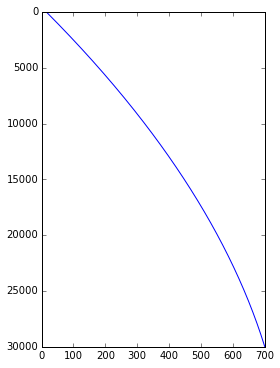

In [9]:
plt.figure(figsize=(4,6))

ax1 = plt.subplot(111)

ax1.plot(analytic_T(calc_q_dot_prime(20), 700), z_vec)

ax1.invert_yaxis()



In [10]:
ls .

chi_sq_keeps.csv     geotherms.ipynb           ssrd_bayes.ipynb
comparisons_new.zip  get_completed_runs.ipynb  ssrd_results_check.ipynb
comparisons_old.zip  master_df.csv             Untitled0.ipynb
fit_df.csv           post_run_params.csv


In [11]:
post_params = pd.read_csv('post_run_params.csv', index_col=0)

In [12]:
post_params.head()

,tA1,tA2,tA3,tA4,tA5,rA1,rA2,rA3,rA4,ssrd_extension,...,tB2,tB3,tB4,rB1,rB2,rB3,wpf_extension,net_extension,moho_T,heat_prod
549e03,37.073522,35.485636,13.743297,8.436829,0,4.561845,0.346421,2.698389,0,28.230375,...,16.767786,2.404057,0,2.038232,0.074253,0.666312,1.748939,29.979314,894.748395,13.812082
882978,20.750274,18.351422,16.829403,15.564430,0,3.665392,2.037698,4.414297,0,16.958940,...,31.348011,9.343965,0,0.139043,0.114695,0.129684,3.086497,20.045437,1012.970209,31.826195
aa38c5,47.165230,32.501079,11.689945,11.279109,0,0.676151,0.882825,7.278156,0,30.348805,...,4.347923,4.279544,0,1.171598,2.054148,0.463667,2.169120,32.517925,721.839970,16.171518
537383,48.698591,33.287786,13.559098,12.874483,0,0.357448,0.961613,9.954845,0,30.365557,...,20.516861,1.105767,0,0.045584,0.089718,1.399530,2.570729,32.936286,738.624671,8.208766
0b4238,74.526536,74.480661,24.601576,13.363927,0,8.494210,0.050841,1.694108,0,21.310989,...,3.901997,1.205045,0,0.470857,1.162875,0.265173,3.184784,24.495772,749.210699,43.950760


In [13]:
fit_df = pd.read_csv('fit_df.csv', index_col=0)

In [14]:
fit_df.head()

,chi_sq_dof,chi_sq_rel_like
dd5db3,14.931621,1.845167e-06
457aff,182.614986,2.767426e-79
e6650b,45.573989,9.082901e-20
b65cf5,146.516612,1.316439e-63
115ff9,103.761423,4.872401e-45


In [15]:
chi_sq_keeps = pd.read_csv('chi_sq_keeps.csv', index_col=0)

In [16]:
chi_sq_keeps.head()

,chi_sq_dof,chi_sq_rel_like
549e03,4.026461,0.100482
882978,3.148855,0.241672
aa38c5,4.225375,0.082357
537383,3.759130,0.131277
0b4238,3.216286,0.225913


In [17]:
post_params.columns

Index(['tA1', 'tA2', 'tA3', 'tA4', 'tA5', 'rA1', 'rA2', 'rA3', 'rA4',
       'ssrd_extension', 'tB1', 'tB2', 'tB3', 'tB4', 'rB1', 'rB2', 'rB3',
       'wpf_extension', 'net_extension', 'moho_T', 'heat_prod'],
      dtype='object')

In [101]:
#run_list = [run[0] for run in pd.read_csv('run_list.csv', header=False).values]
run_list = [line.strip() for line in open('run_list.csv', 'r').readlines()]

In [102]:
run_list[0]

'dd5db3'

In [103]:
run_params = pd.read_csv('../scripts/run_params_heat_mods.csv', index_col=0)
run_params = run_params.set_index('run_id')

run_params = run_params.loc[run_list,:]

In [104]:
!head run_list.csv

dd5db3
457aff
e6650b
b65cf5
115ff9
88d9f5
7722bc
65ee98
bd0d7d
cd40db


In [105]:
run_params.head()

,tA1,tA2,tA3,tA4,tA5,rA1,rA2,rA3,rA4,ssrd_extension,...,tB2,tB3,tB4,rB1,rB2,rB3,wpf_extension,net_extension,moho_T,heat_prod
run_id,,,,,,,,,,,,,,,,,,,,,
dd5db3,70.597303,69.345767,30.232622,25.358526,0,8.075238,0.073227,3.571632,0,29.476683,...,2.870773,0.963151,0,0.051937,0.081328,1.506648,1.662275,31.138958,1002.507222,47.133589
457aff,69.349414,65.780895,63.529938,60.867796,0,0.376663,1.193357,1.544912,0,7.901216,...,17.338194,16.370234,0,1.956564,0.625369,0.106308,3.456640,11.357856,933.482467,5.464423
e6650b,55.421344,24.477244,22.310956,16.049569,0,0.119154,2.231891,0.987153,0,14.266243,...,23.744352,0.488331,0,0.493210,0.009116,3.640592,3.405204,17.671447,893.739632,14.979549
b65cf5,54.022877,50.897247,49.623826,35.719695,0,3.010776,2.663411,0.076554,0,13.454738,...,2.520189,0.143856,0,0.820890,0.103866,2.809132,2.147152,15.601890,767.456563,23.603191
115ff9,62.209945,60.663826,51.682102,47.699277,0,1.037848,1.100099,5.184882,0,31.181331,...,5.753312,4.220766,0,0.035847,1.427093,0.332304,2.719237,33.900568,1066.372309,38.695904


In [20]:
run_params.columns

Index(['tA1', 'tA2', 'tA3', 'tA4', 'tA5', 'rA1', 'rA2', 'rA3', 'rA4',
       'ssrd_extension', 'tB1', 'tB2', 'tB3', 'tB4', 'rB1', 'rB2', 'rB3',
       'wpf_extension', 'net_extension', 'moho_T', 'heat_prod'],
      dtype='object')

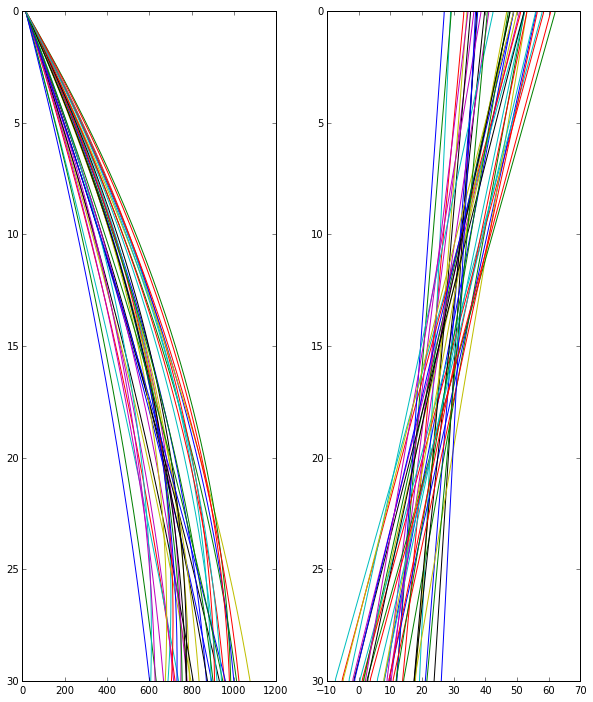

In [22]:
plt.figure(figsize=(10,12))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharey=ax1)

for run in post_params.index:
    params = post_params.loc[run, :]
    
    T_z = analytic_T(calc_q_dot_prime(params.heat_prod), params.moho_T)
    
    dT_dz = np.gradient(T_z, z_step) * 1000
    
    ax1.plot(T_z, z_vec / 1000)
    
    ax2.plot(dT_dz, z_vec / 1000)
    
    
ax1.invert_yaxis()

plt.show()
    

In [23]:
def mean_upper_geotherm(run, max_depth=7000, df=post_params):
    
    max_depth_ind = np.argmin( np.abs(z_vec - max_depth)) + 1
    
    params = df.loc[run, :]
    
    T_z = analytic_T(calc_q_dot_prime(params.heat_prod), params.moho_T)
    
    dT_dz = np.gradient(T_z, z_step) * 1000
    
    return np.mean(dT_dz[0:max_depth_ind])  
    

In [24]:
mean_upper_geotherm(post_params.index[0])

35.678114980854403

In [25]:
post_mean_geotherms = pd.Series([mean_upper_geotherm(row) for row in post_params.index],
                                index=post_params.index)

In [106]:
mean_geotherms = pd.Series([mean_upper_geotherm(row, df=run_params) for row in run_params.index],
                            index=run_params.index)

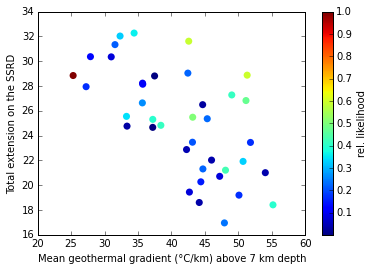

In [27]:
plt.scatter(post_mean_geotherms, post_params.ssrd_extension, 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')

plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('Total extension on the SSRD')

plt.show()

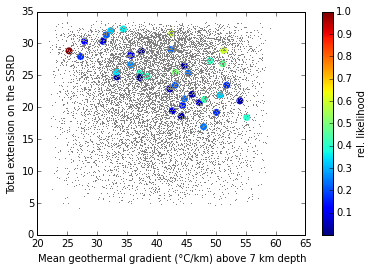

In [107]:
plt.plot(mean_geotherms, run_params.ssrd_extension, ',', color='grey')

plt.scatter(post_mean_geotherms, post_params.ssrd_extension, 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')


plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('Total extension on the SSRD')

plt.show()

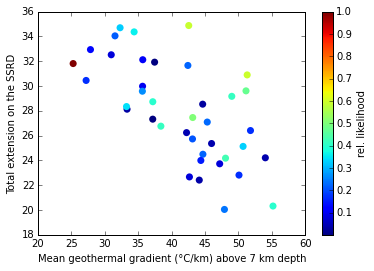

In [29]:
plt.scatter(post_mean_geotherms, post_params.net_extension, 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')

plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('Total extension on the SSRD')

plt.show()

In [31]:
np.mean([0,0,0,0,0,0,0,0,0,10]), np.mean([1,1,1,1,1,1,1,1,1,1])

(1.0, 1.0)

In [32]:
np.mean(np.cumsum([0,0,0,0,0,0,0,0,0,10])), np.mean(np.cumsum([1,1,1,1,1,1,1,1,1,1]))

(1.0, 5.5)

In [33]:
def mean_cum_extension(row_id, df, start_time=40.0, end_time=15., subtract_start=True):
    
    cum_ext_array = df.loc[row_id,start_time:end_time]
    
    if subtract_start == True:
        cum_ext_array = cum_ext_array - cum_ext_array.min()
        
    return cum_ext_array.mean()

In [34]:
ssr_ext_rate_history = pd.read_csv('ext_rate_history_ssr.csv', index_col=0)

In [39]:
ssr_cum_ext_history = np.cumsum(ssr_ext_rate_history, axis=1) * 0.01

In [42]:
ssr_cum_ext_history.head()

,80.0,79.99,79.98,79.97,79.96,79.95,79.94,79.93,79.92,79.91,...,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.0
dd5db3,0,0,0,0,0,0,0,0,0,0,...,31.034497,31.043979,31.053460,31.062942,31.072424,31.081905,31.091387,31.100869,31.110350,31.119832
457aff,0,0,0,0,0,0,0,0,0,0,...,11.351425,11.352094,11.352763,11.353432,11.354101,11.354770,11.355439,11.356108,11.356777,11.357447
e6650b,0,0,0,0,0,0,0,0,0,0,...,17.499302,17.522213,17.545124,17.568035,17.590946,17.613857,17.636768,17.659679,17.682590,17.705501
b65cf5,0,0,0,0,0,0,0,0,0,0,...,15.452412,15.470091,15.487769,15.505448,15.523126,15.540805,15.558483,15.576161,15.593840,15.611518
115ff9,0,0,0,0,0,0,0,0,0,0,...,33.869264,33.871355,33.873446,33.875537,33.877629,33.879720,33.881811,33.883902,33.885994,33.888085


In [81]:
ssr_ext_rate_history.shape

(9981, 8001)

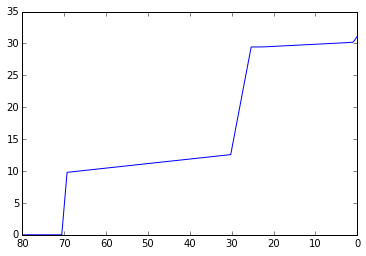

In [82]:
ssr_cum_ext_history.iloc[0,:].plot()

In [60]:
ssr_cum_ext_history.columns = ssr_cum_ext_history.columns.astype('float')

In [61]:
mean_cum_extension(run_params.index[0], ssr_cum_ext_history)

0.009345738656398647

In [64]:
mean_cum_exts = pd.Series([mean_cum_extension(row_id, ssr_cum_ext_history)
                           for row_id in ssr_cum_ext_history.index],
                          index=ssr_cum_ext_history.index)

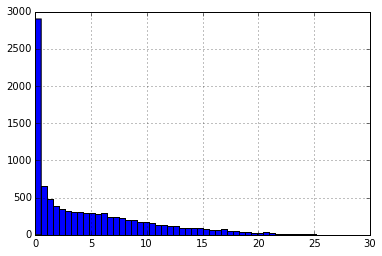

In [65]:
mean_cum_exts.hist(bins=50)
plt.show()

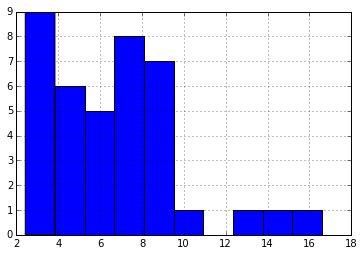

In [66]:
mean_cum_exts.loc[post_params.index].hist()
plt.show()

In [83]:
len(mean_geotherms)

9980

In [84]:
run_params.shape

(9980, 21)

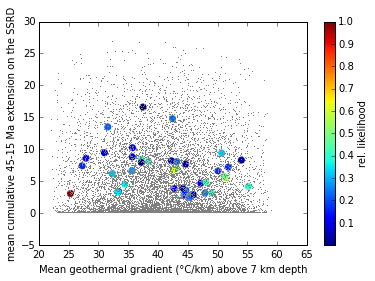

In [108]:
plt.plot(mean_geotherms, mean_cum_exts, ',', color='grey')

plt.scatter(post_mean_geotherms, 
            mean_cum_exts.loc[post_params.index], 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')


plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('mean cumulative 45-15 Ma extension on the SSRD')

plt.show()

In [112]:
best_run = fit_df[fit_df.chi_sq_rel_like == 1].index[0]

best_run

'2722de'

In [115]:
exhum_diffs = [np.sum(  np.abs( ssr_cum_ext_history.loc[run,:] -
                                ssr_cum_ext_history.loc[best_run,:]))
               for run in run_list]

exhum_diffs = pd.Series(exhum_diffs, index=run_list)

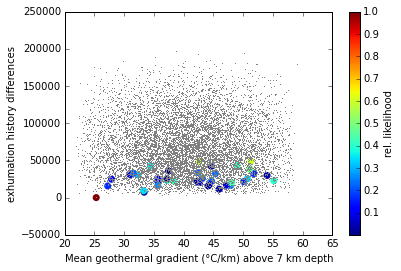

In [118]:
plt.plot(mean_geotherms, exhum_diffs, ',', color='grey')

plt.scatter(post_mean_geotherms,
            exhum_diffs.loc[post_params.index], 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')


plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('exhumation history differences')

plt.show()

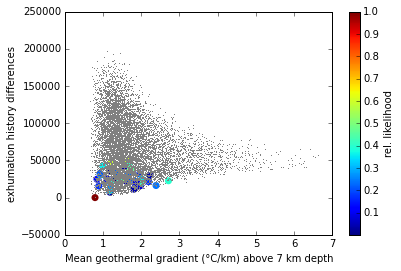

In [119]:
plt.plot(mean_geotherms / run_params.net_extension, 
         exhum_diffs, ',', color='grey')

plt.scatter(post_mean_geotherms / post_params.net_extension,
            exhum_diffs.loc[post_params.index], 
            c=chi_sq_keeps.chi_sq_rel_like,
            s=50, lw=0)
plt.colorbar(label='rel. likelihood')


plt.xlabel('Mean geothermal gradient (°C/km) above 7 km depth')
plt.ylabel('exhumation history differences')

plt.show()